## INST414 | Assignment 4 - Module 4 | Daniel Hernandez Gonzalez

In [1]:
# Pandas, we all love them. 
import pandas as pd

#spotify tools.
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Tools for making calculations
from sklearn.cluster import KMeans

# Graphing data
import matplotlib.pyplot as plt


# Authenticating with Spotify API

In [2]:
# Authentication keys, taken out from my final push.
client_id = '****'
client_secret = '****'
username = '*****'

# set up Spotify API credentials
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Gathering data

#### Setting up API call

In [5]:
# Ver. 3.0 from what I started with this part of code. 
# It is more efficient to make a function to do this set of instructions instead of writing it more than once. 
def get_songs(genre, year):
    # set of 50 songs per API request
    query = f'genre:{genre}, year:{year}'
    limit = 50          # This is a place holder for adding to the offset after the first iteration bellow. 
    offset = 0          # This value indicated how many items the API call will skip before returning tracks
    top_songs = []      # List of all songs

    # Spotify API calls for each set of 50 songs
    for i in range(4):
        results = sp.search(q=query, type='track', limit=limit, offset=offset)      # The actuall API call.
        top_songs += results['tracks']['items']                                     # Feeds songs back into top_songs
        offset += limit                                                             # interger for how many songs the next iteration skips before capturing data 

    return top_songs


In [6]:
# Checking output until I 200 total items
testing = get_songs('rap', '2022')

#testing items
track_num = 0
for i in range(5):
    print(testing[track_num]["name"])
    track_num += 1

Just Wanna Rock
Kill Bill
Creepin' (with The Weeknd & 21 Savage)
Rich Flex
Superhero (Heroes & Villains) [with Future & Chris Brown]


#### Gathering top 200 songs from various years for the following genres. 

In [8]:
# I chose specific genres based on the genres shown on Spotify's platform and a few that I am interested in. Genre page: https://open.spotify.com/genre/hub-browse-grid
genre_list = ['rap', 'pop', 'house', 'country', 'rock', 'soul', 'inde', 'punk', 'corrido', 'banda']

# These are the years I will be assessing. There is no particular reason why I chose to go back in increments of two. I think more distance could yield better insights. 
years = [2022, 2020, 2018, 2016, 2014, 2007]

# Creating an empty DataFrame with columns.
songs_df = pd.DataFrame(columns=['track_id', 'track_name', 'artist_name', 'year', 'genre', 'tempo', 'popularity', 'acousticness', 'danceability', 'energy', 'loudness'])


In [9]:
# Iterating over the years and genres to add data into songs_df
for year in years:

    for genre in genre_list:
        genre_songs = get_songs(genre, year)

        for track in genre_songs:
            # All of the data I can pull from the sp.search call 
            track_id = track['id']
            artist_names = [artist['name'] for artist in track['album']['artists']]
            artist_name = ', '.join(artist_names)
            track_name = track['name']
            popularity = track['popularity']
            genre = genre

            # Spotify API call to get additional audio features
            audio_features = sp.audio_features(track_id)

            if audio_features: # If this section was returned.
                acousticness = audio_features[0]['acousticness']
                danceability = audio_features[0]['danceability']
                energy = audio_features[0]['energy']
                tempo = audio_features[0]['tempo']
                loudness = audio_features[0]['loudness']
                
            else:              # Incase any missing values. Will drop these rows after.
                acousticness, danceability, energy, tempo = None, None, None, None

            # adding all data that was pulled into songs_df
            songs_df.loc[len(songs_df)] = [track_id, track_name, artist_name, year, genre, tempo, popularity, acousticness, danceability, energy, loudness]
            

In [10]:
# Checking shape of df
print(f"{songs_df.shape}\n")

(12000, 11)



### Exporting the data frame as a csv. 

This section made taking breaks easier. I was needing to keep running the code above and wait 20 full minutes before working again. 

In [11]:
# Exporting songs_df as a CSV file.
songs_df.to_csv('songs.csv', index=False)

In [9]:
# Reading in the CSV as a new df
all_songs_df = pd.read_csv('songs.csv')
all_songs_df

,track_id,track_name,artist_name,year,genre,tempo,popularity,acousticness,danceability,energy,loudness
0,4FyesJzVpA39hbYvcseO2d,Just Wanna Rock,Lil Uzi Vert,2022,rap,150.187,91,0.0652,0.486,0.545,-7.924
1,1Qrg8KqiBpW07V7PNxwwwL,Kill Bill,SZA,2022,rap,88.980,94,0.0521,0.644,0.735,-5.747
2,2dHHgzDwk4BJdRwy9uXhTO,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,2022,rap,97.950,96,0.4170,0.715,0.620,-6.005
3,1bDbXMyjaUIooNwFE9wn0N,Rich Flex,"Drake, 21 Savage",2022,rap,153.150,91,0.0503,0.561,0.520,-9.342
4,0vjeOZ3Ft5jvAi9SBFJm1j,Superhero (Heroes & Villains) [with Future & C...,Metro Boomin,2022,rap,116.622,90,0.1520,0.526,0.606,-5.300
...,...,...,...,...,...,...,...,...,...,...,...
11995,6wJhHptYOSIqMlS5uH06M8,Linda Güerita,Banda El Recodo,2007,banda,147.183,31,0.5460,0.691,0.780,-4.209
11996,3ylMOJE3voNOIa85rQr5In,Sin Una Salida,El Trono de Mexico,2007,banda,144.567,24,0.5020,0.623,0.731,-3.357
11997,14xEDvISNBU6oyCT5jL0nR,La Huella De Mis Besos,Julio Chaidez,2007,banda,97.769,25,0.6570,0.778,0.487,-5.323
11998,5TlwryJMoMVd8P0gcNB8iK,Chaiyo Nava,El As De La Sierra,2007,banda,137.278,28,0.1590,0.773,0.378,-7.325


# Data cleaning

In [10]:
# Showing shape and null values.
print(f"{all_songs_df.shape}\n")
print(all_songs_df.isna().sum())

# Drops NA values
#songs_df.dropna(inplace=True)
#print(f"\n{songs_df.shape}")

# I was getting errors in pervious versions of my code. I kept this incase I wanted to come back and test different genres. 

(12000, 11)

track_id        0
track_name      0
artist_name     0
year            0
genre           0
tempo           0
popularity      0
acousticness    0
danceability    0
energy          0
loudness        0
dtype: int64


In [11]:
# Dataframe size before cleaning
print(f'table size before cleaning: {all_songs_df.shape}') 

# Dropping duplicate track_id
all_songs_df = all_songs_df.drop_duplicates(subset=['track_id'])

# Dataframe size after cleaning and displaying table
print(f'\ntable size after cleaning: {all_songs_df.shape}\n') 
all_songs_df

table size before cleaning: (12000, 11)

table size after cleaning: (10796, 11)



,track_id,track_name,artist_name,year,genre,tempo,popularity,acousticness,danceability,energy,loudness
0,4FyesJzVpA39hbYvcseO2d,Just Wanna Rock,Lil Uzi Vert,2022,rap,150.187,91,0.0652,0.486,0.545,-7.924
1,1Qrg8KqiBpW07V7PNxwwwL,Kill Bill,SZA,2022,rap,88.980,94,0.0521,0.644,0.735,-5.747
2,2dHHgzDwk4BJdRwy9uXhTO,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,2022,rap,97.950,96,0.4170,0.715,0.620,-6.005
3,1bDbXMyjaUIooNwFE9wn0N,Rich Flex,"Drake, 21 Savage",2022,rap,153.150,91,0.0503,0.561,0.520,-9.342
4,0vjeOZ3Ft5jvAi9SBFJm1j,Superhero (Heroes & Villains) [with Future & C...,Metro Boomin,2022,rap,116.622,90,0.1520,0.526,0.606,-5.300
...,...,...,...,...,...,...,...,...,...,...,...
11992,462GGEdsO7iow2sJOWjuPX,Leonardo Reyes,La Original Banda El Limón de Salvador Lizárraga,2007,banda,205.605,30,0.5620,0.398,0.589,-2.404
11994,0QKyb4OfXl0P9vqdUMGokR,Culpable o No,El Flaco Elizalde,2007,banda,148.051,32,0.5140,0.719,0.453,-8.279
11995,6wJhHptYOSIqMlS5uH06M8,Linda Güerita,Banda El Recodo,2007,banda,147.183,31,0.5460,0.691,0.780,-4.209
11996,3ylMOJE3voNOIa85rQr5In,Sin Una Salida,El Trono de Mexico,2007,banda,144.567,24,0.5020,0.623,0.731,-3.357


### I attempted to test subsetting the df into different years although it did not provide any significant difference. 

In [20]:
songs_2022 = all_songs_df[all_songs_df['year'] == 2022]
songs_2020 = all_songs_df[all_songs_df['year'] == 2020]
songs_2018 = all_songs_df[all_songs_df['year'] == 2018]
songs_2016 = all_songs_df[all_songs_df['year'] == 2016]
songs_2007 = all_songs_df[all_songs_df['year'] == 2007]

In [23]:
print(all_songs_df.shape)
print(songs_2022.shape)
print(songs_2020.shape)
print(songs_2018.shape)
print(songs_2016.shape)
print(songs_2007.shape)

(10796, 11)
(1844, 11)
(1858, 11)
(1812, 11)
(1742, 11)
(1784, 11)


# Finding the best K value

### Elbow method

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

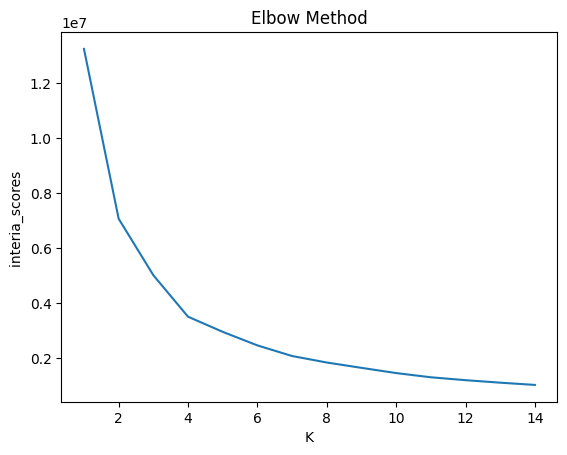

In [47]:
k_values = range(1, 15)

# Calculating the interia scores  for each value of k
interia_scores  = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=25)
    kmeans.fit(all_songs_df[['tempo', 'popularity']])
    interia_scores .append(kmeans.inertia_)

# Plot the interia_scores for each k value
plt.plot(k_values, interia_scores )
plt.xlabel('K')
plt.ylabel('interia_scores ')
plt.title('Elbow Method')
plt.show()

In [39]:
kmeans = KMeans(n_clusters=10, random_state=25)
kmeans.fit(all_songs_df[['tempo', 'popularity']])
labels = kmeans.labels_
all_songs_df['cluster'] = labels

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\danie\AppData\Local\Temp\ipykernel_38420\653373621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_songs_df['cluster'] = labels


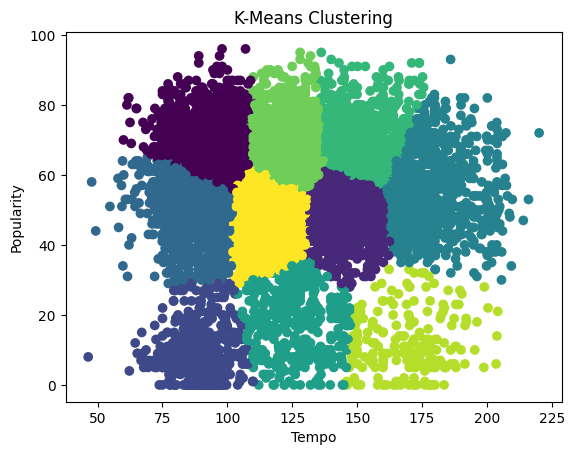

In [49]:
# Scatter plot 
plt.scatter(all_songs_df['tempo'], all_songs_df['popularity'], c=labels)
plt.xlabel('Tempo')
plt.ylabel('Popularity')
plt.title('K-Means Clustering')
plt.show()

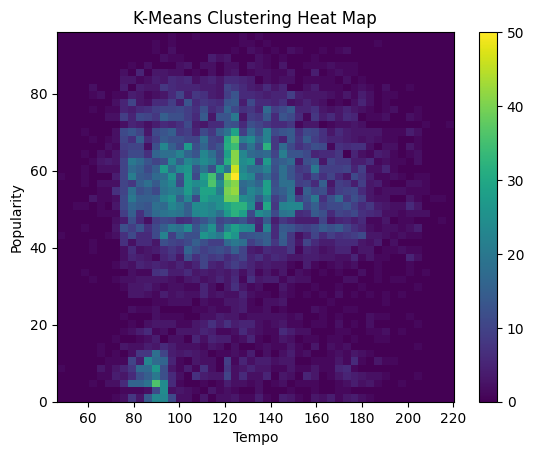

In [52]:
# Heatmap with a 2d histogram
plt.hist2d(all_songs_df['tempo'], all_songs_df['popularity'], bins=50, cmap='viridis')

# Adds colorbar to the side
plt.colorbar()

# Adds axis labels and title
plt.xlabel('Tempo')
plt.ylabel('Popularity')
plt.title('K-Means Clustering Heat Map')

plt.show()